#### Regression in Keras


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

##### Generate a dataset for regression

In [2]:
from sklearn.datasets import make_regression

In [3]:
x,y = make_regression(n_samples=1000,n_features=10,n_informative=6,noise=10,random_state=42)

In [4]:
x

array([[ 1.12790899,  0.49470565,  0.0443588 , ...,  0.38343503,
         1.00592451,  0.15449367],
       [-0.49665105,  1.26961326, -1.2774366 , ..., -1.24515058,
        -0.14358159,  0.92304483],
       [ 0.6686548 , -0.73095628, -0.53533509, ...,  0.75792185,
         1.84860883,  0.09806754],
       ...,
       [-0.83418485,  0.67229341, -2.4036686 , ..., -1.50047655,
         1.6722659 , -2.26605209],
       [ 0.8896308 ,  1.44697788, -0.18687164, ...,  0.19655478,
        -1.48556037,  0.08228399],
       [ 1.60734558,  0.86047349,  0.3074067 , ..., -0.58307744,
         0.28257995,  0.49097495]])

In [5]:
y

array([-2.62582272e+01,  4.07633307e+01,  3.51849040e+01,  9.18539795e+00,
       -1.17149738e+02,  1.16687987e+02, -5.76432966e+01, -1.87389866e+02,
       -1.01386154e+02,  4.86377872e+01,  1.58474643e+01,  4.74463777e+01,
       -9.20044905e+01, -1.03449820e+02, -9.79708735e+01, -1.07152945e+02,
        8.41589920e+01, -1.59284032e+01, -8.75763995e+01, -9.35469442e+01,
        1.17947308e+02,  8.27442365e+01,  1.37827792e+02,  8.12022225e+01,
       -6.30615548e+01,  1.82714823e+02, -1.86302211e+02, -9.00608006e+01,
        3.32200126e+01, -5.43175812e+00, -1.30630067e+02,  1.01759737e+01,
        1.47207281e+01,  1.16321893e+01, -9.26385260e+01, -4.68970962e+01,
       -3.75960961e+01, -2.66787086e+01,  2.09257954e-01,  6.09708208e+01,
        4.76958379e+01,  6.65711234e-02, -6.60998640e+01,  8.67880911e+01,
        1.33424638e+00,  2.94622941e+01, -4.25075516e+01, -9.19587342e+01,
       -2.06770678e+01,  9.47502943e+01,  7.58011700e+01, -3.40262501e+01,
        6.13882732e+01,  

In [6]:
import pandas as pd
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9
0,1.127909,0.494706,0.044359,-1.745707,-0.336553,-0.409308,-1.127496,0.383435,1.005925,0.154494
1,-0.496651,1.269613,-1.277437,1.156582,0.406094,1.357620,0.418515,-1.245151,-0.143582,0.923045
2,0.668655,-0.730956,-0.535335,0.358454,1.295872,0.685508,-0.175564,0.757922,1.848609,0.098068
3,2.121631,0.729773,0.314445,-0.358958,-2.025040,0.043031,-2.065303,-0.931002,0.686858,-0.283152
4,-0.123729,-0.856498,-0.993863,0.420192,-1.184031,-1.264498,-0.382817,0.097670,-1.793106,-0.397680
...,...,...,...,...,...,...,...,...,...,...
995,-0.251539,1.194109,-1.725807,-0.677565,1.422370,-0.464404,0.783391,-0.981166,0.462061,-0.597510
996,0.298798,0.058370,-0.025494,-0.217159,1.898735,-0.343206,0.973726,-0.603859,-2.085792,-0.773456
997,-0.834185,0.672293,-2.403669,1.392456,-0.350778,-1.478777,-0.737380,-1.500477,1.672266,-2.266052
998,0.889631,1.446978,-0.186872,-0.439731,1.065480,1.031845,0.267050,0.196555,-1.485560,0.082284


In [7]:
cols = [f'x{i+1}' for i in range(10)]

In [8]:
cols

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

In [9]:
x.columns = cols
x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.127909,0.494706,0.044359,-1.745707,-0.336553,-0.409308,-1.127496,0.383435,1.005925,0.154494
1,-0.496651,1.269613,-1.277437,1.156582,0.406094,1.357620,0.418515,-1.245151,-0.143582,0.923045
2,0.668655,-0.730956,-0.535335,0.358454,1.295872,0.685508,-0.175564,0.757922,1.848609,0.098068
3,2.121631,0.729773,0.314445,-0.358958,-2.025040,0.043031,-2.065303,-0.931002,0.686858,-0.283152
4,-0.123729,-0.856498,-0.993863,0.420192,-1.184031,-1.264498,-0.382817,0.097670,-1.793106,-0.397680


In [10]:
y = pd.DataFrame(y)
y.columns = ['y']

In [11]:
y

,y
0,-26.258227
1,40.763331
2,35.184904
3,9.185398
4,-117.149738
...,...
995,-96.717837
996,-50.240682
997,-150.558474
998,55.935076


In [12]:
x.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

#### Preprocessing on X Dataframe - Scikit Learn Pipelines

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [15]:
x_pre = num_pipe.fit_transform(x)
x_pre

array([[ 1.08924995,  0.5262603 ,  0.03340657, ...,  0.43392418,
         0.99871794,  0.18005449],
       [-0.4873097 ,  1.31467041, -1.28190467, ..., -1.22297029,
        -0.11030302,  0.95923927],
       [ 0.64356521, -0.72075836, -0.54344359, ...,  0.81492051,
         1.81172327,  0.12284766],
       ...,
       [-0.81487048,  0.70694246, -2.40261186, ..., -1.48273446,
         1.64159107, -2.27398178],
       [ 0.85801209,  1.49512555, -0.19668956, ...,  0.24379548,
        -1.40501786,  0.10684572],
       [ 1.55452077,  0.89840152,  0.29516407, ..., -0.54938868,
         0.30084928,  0.52119131]])

In [16]:
cols = num_pipe.get_feature_names_out()
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'],
      dtype=object)

In [17]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.089250,0.526260,0.033407,-1.749812,-0.396542,-0.417858,-1.091289,0.433924,0.998718,0.180054
1,-0.487310,1.314670,-1.281905,1.108072,0.389484,1.327879,0.408652,-1.222970,-0.110303,0.959239
2,0.643565,-0.720758,-0.543444,0.322156,1.331236,0.663828,-0.167724,0.814921,1.811723,0.122848
3,2.053611,0.765424,0.302167,-0.384280,-2.183658,0.029057,-2.001149,-0.903361,0.690889,-0.263646
4,-0.125406,-0.848488,-0.999722,0.382949,-1.293523,-1.262791,-0.368801,0.143192,-1.701732,-0.379759


In [18]:
x_pre.mean()

x1    -5.084821e-17
x2     2.153833e-17
x3    -5.939693e-18
x4    -3.552714e-18
x5     1.110223e-17
x6    -1.587619e-17
x7    -2.137179e-18
x8     9.048318e-17
x9    -8.248957e-17
x10   -4.218847e-18
dtype: float64

In [19]:
x_pre.std()

x1     1.0005
x2     1.0005
x3     1.0005
x4     1.0005
x5     1.0005
x6     1.0005
x7     1.0005
x8     1.0005
x9     1.0005
x10    1.0005
dtype: float64

#### Train test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [21]:
xtrain.shape

(800, 10)

In [22]:
xtest.shape

(200, 10)

In [23]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
29,-0.817857,1.525604,0.283440,-1.524252,-0.610945,0.200718,-0.568710,-1.144254,-1.030434,-0.592863
535,-0.967141,0.009196,0.767372,-0.095223,-1.813786,-0.309557,0.374637,-1.082147,-0.708355,1.371617
695,0.704996,-0.968161,-0.432255,-1.375537,-0.532049,-1.305149,-0.608642,0.759479,-1.513374,-0.176223
557,-0.902258,0.372713,-0.969766,-0.973320,1.055390,0.018945,-0.220926,-0.005674,-0.703560,0.925938
836,1.571342,-0.634285,-0.192734,1.323027,-0.307425,-0.490412,0.121624,-0.769260,-0.891531,0.350973


In [24]:
ytrain.head()

,y
29,-5.431758
535,-17.953733
695,-109.987597
557,-45.604222
836,-61.715412


In [25]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
521,-1.539235,0.127645,-0.972694,-0.814698,2.321516,1.639914,1.193079,-2.310444,0.454410,1.285208
737,0.182333,-0.327125,-0.013507,-0.555748,-0.023732,-0.981631,-0.645624,-0.337220,-1.860180,-1.343407
740,0.111152,-0.001844,0.509536,-0.595736,-1.122867,1.693366,0.039480,2.223332,0.449178,0.645430
660,-0.735266,-1.508005,-1.410153,-0.112648,1.378419,0.067993,-0.297386,0.817092,-1.377995,0.347014
411,0.174033,-0.124948,1.397528,1.782822,0.552199,-0.989612,-0.190522,0.397260,-0.113787,0.360788


In [26]:
ytest.head()

,y
521,48.332745
737,-72.695837
740,139.484176
660,-45.031583
411,1.551620


#### Create a Keras Model


In [27]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
xtrain.shape[0]

800

In [29]:
xtrain.shape[1]

10

In [30]:
# Initialize the Neural Network Model
nn = Sequential()

# Input + hidden layer 1
nn.add(Dense(64,activation='relu',input_dim = xtrain.shape[1]))

# Hidden layer 2 
nn.add(Dense(32,activation='relu'))

# Output Layer
nn.add(Dense(1,activation='linear'))

#### Compile the model

In [31]:
nn.compile(optimizer = 'adam',loss='mse',metrics=['mae'])

In [32]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Fit the neural network

In [33]:
hist = nn.fit(xtrain,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 2s 16ms/step - loss: 4989.5205 - mae: 56.5590 - val_loss: 4300.8115 - val_mae: 52.8628
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 4922.2256 - mae: 56.1463 - val_loss: 4231.2725 - val_mae: 52.4392
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 4824.9111 - mae: 55.5420 - val_loss: 4122.4673 - val_mae: 51.7578
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 4671.6064 - mae: 54.5906 - val_loss: 3948.3105 - val_mae: 50.6241
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 4433.0713 - mae: 53.0351 - val_loss: 3691.3872 - val_mae: 48.8706
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 4094.7651 - mae: 50.7336 - val_loss: 3333.2788 - val_mae: 46.3054
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 3639.9758 - mae: 47.5036 - val_loss: 2879.3071 - val_mae: 42.7808
Epoch 8/100
20/20 [=======

#### Plot the learning curve

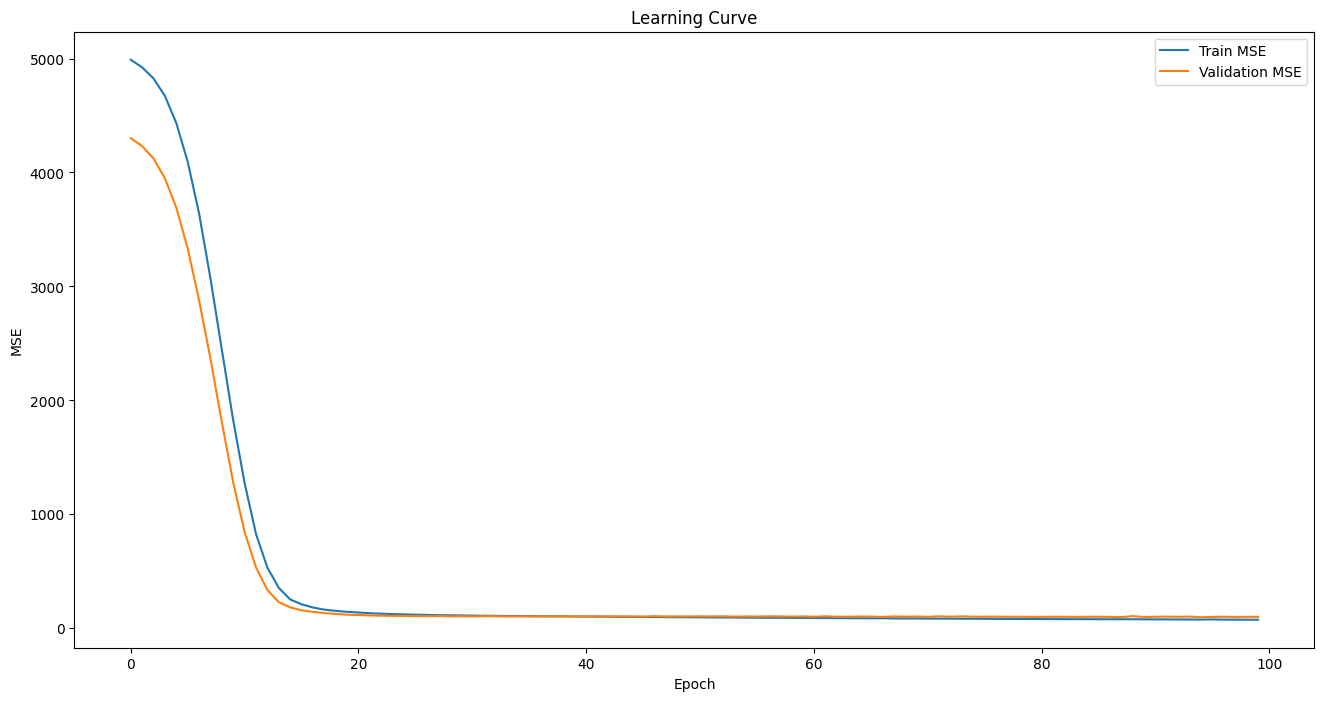

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Train MSE')
plt.plot(hist.history['val_loss'],label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.show()

#### Evaluate the model

In [35]:
nn.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 2ms/step - loss: 79.5802 - mae: 7.1197


[79.58016967773438, 7.1197190284729]

In [36]:
nn.evaluate(xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 99.3725 - mae: 8.0650


[99.3724594116211, 8.064984321594238]

#### Predict train and test


In [37]:
ypred_tr = nn.predict(xtrain)
ypred_ts = nn.predict(xtest)

7/7 [==============================] - 0s 2ms/step


In [38]:
ypred_tr[0:5]

array([[  -0.6458087],
       [  -7.0142517],
       [-116.26475  ],
       [ -44.735535 ],
       [ -46.201473 ]], dtype=float32)

In [39]:
ytrain.head()

,y
29,-5.431758
535,-17.953733
695,-109.987597
557,-45.604222
836,-61.715412


In [40]:
ypred_ts[0:5]

array([[ 36.868195 ],
       [-87.29009  ],
       [133.364    ],
       [-55.590057 ],
       [ 10.6189785]], dtype=float32)

In [41]:
ytest.head()

,y
521,48.332745
737,-72.695837
740,139.484176
660,-45.031583
411,1.551620


#### R2 scores in train and test

In [42]:
from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain,ypred_tr)
tr_r2

0.983692726964415

In [43]:
ts_r2 = r2_score(ytest,ypred_ts)
ts_r2

0.9795119940254038

#### Save the model for future reference

In [44]:
nn.save('Regression.keras')

#### Load the model back


In [45]:
from keras.models import load_model
model = load_model('Regression.keras')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
